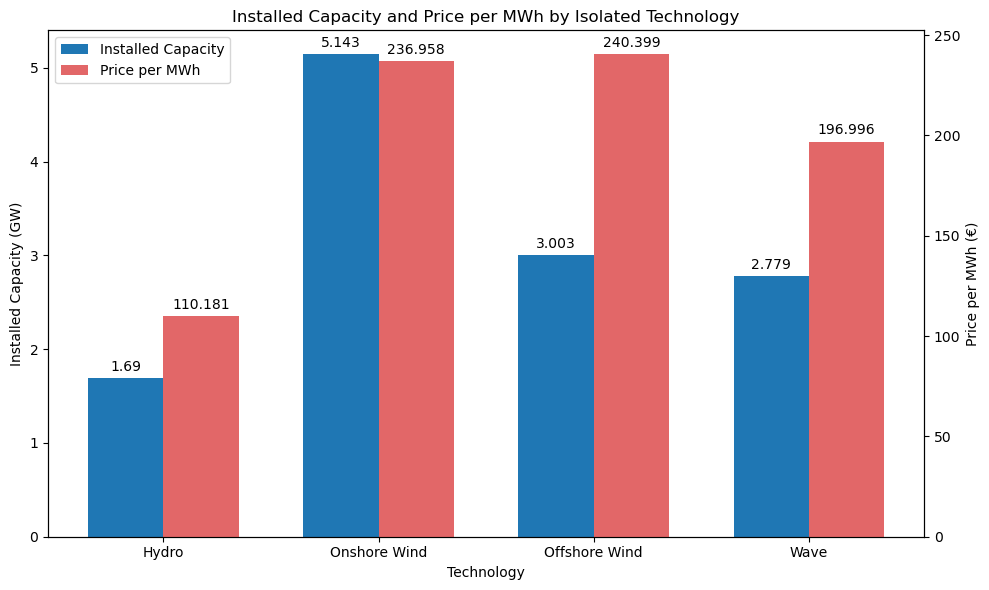

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV
df = pd.read_csv('../results/solo_tech_data.csv')

# Settings for the dual bars
n = len(df)
index = np.arange(n)
bar_width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

# Colors and aesthetics
color_capacity = 'tab:blue'
color_price = 'tab:red'

# Plot installed capacity
capacity_bars = ax1.bar(index - bar_width/2, df['installed_capacity'].round(3), bar_width, 
                        color=color_capacity, label='Installed Capacity')

# Create a twin Axes sharing the xaxis for the price per MWh
ax2 = ax1.twinx()
price_bars = ax2.bar(index + bar_width/2, df['price_per_mwh'].round(3), bar_width, 
                     color=color_price, label='Price per MWh', alpha=0.7)

# Labeling and aesthetics
ax1.set_xlabel('Technology')
ax1.set_ylabel('Installed Capacity (GW)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax2.set_ylabel('Price per MWh (€)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(index)
ax1.set_xticklabels(df['technology'])

# Annotate the bars with their values
for bar in capacity_bars:
    height = bar.get_height()
    ax1.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

for bar in price_bars:
    height = bar.get_height()
    ax2.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
    
plt.title('Installed Capacity and Price per MWh by Isolated Technology')
fig.tight_layout()
plt.show()
